## RECRUTING WORKERS IN INTERNET

SITUATION:
Gold mining company needs workers for seasonal work.
Internet promo use for recruting.
Management promo based on standart dashboards of Yandex systems.
We have statistic data.
two methods used for recruting: context ads (ADS) and publications in specialized online communities (PR).

TARGETS:
Based analysis show low effective PR activity (low target actions). 
But 
1. I should check is PR has any additional effect (for example, direct visits to the site)
2. Check does it grow of popularity site? 
3. Does any cyclical in time trends? (weekdays)
4. Make a general model for forecasting visits to site for prognosis and optimisation promo strategy.

In [1]:
#–∏–º–ø–æ—Ä—Ç –≤—Å–µ—Ö –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

C:\Users\OLEG\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
excel_file = 'C:/Users/OLEG/Jupyter/Gold/ads.xls'
df = pd.read_excel(excel_file)
df.head()

data  shows  clicks      sum  price per click  deep  letter_pers  \
0  15.01.2024  14553     123  1747.88            14.21  1.77         0.00   
1  16.01.2024  15920     180   800.00             4.44  2.13         1.67   
2  17.01.2024   6098     115   876.32             7.62  1.71         0.87   
3  18.01.2024  14214      99  1493.44            15.09  2.85         1.01   
4  19.01.2024  11814     122   910.00             7.46  1.94         3.28   

   form_pers  hr_pers  messenger_pers  letter  form  hr  messenger  
0       0.81     0.81            0.00       0     1   1          0  
1       2.78     2.22            0.00       3     5   4          0  
2       1.74     1.74            0.00       1     2   2          0  
3       4.04     3.03            2.02       1     4   3          2  
4       3.28     2.46            0.82       4     4   3          1

#### DESCRIBING DATA

data - Data 
shows - shows AD 
clicks - clicks on AD 
sum - per day 
price per click
deep - how many site pages looking (average per day)


Results persantage (action / clicks * 100%)
- letter_pers - send letter
- form_pers - fill form
- hr_pers - send message to HR department
- messenger_pers - go to messenger


Results (actions per day)
- letter
- form
- hr
- messenger

Data from 15/01/24 to 13/04/24
no missing data


In [3]:
df['date'] = pd.to_datetime(df['data'], format='%d.%m.%Y')
df.head()

data  shows  clicks      sum  price per click  deep  letter_pers  \
0  15.01.2024  14553     123  1747.88            14.21  1.77         0.00   
1  16.01.2024  15920     180   800.00             4.44  2.13         1.67   
2  17.01.2024   6098     115   876.32             7.62  1.71         0.87   
3  18.01.2024  14214      99  1493.44            15.09  2.85         1.01   
4  19.01.2024  11814     122   910.00             7.46  1.94         3.28   

   form_pers  hr_pers  messenger_pers  letter  form  hr  messenger       date  
0       0.81     0.81            0.00       0     1   1          0 2024-01-15  
1       2.78     2.22            0.00       3     5   4          0 2024-01-16  
2       1.74     1.74            0.00       1     2   2          0 2024-01-17  
3       4.04     3.03            2.02       1     4   3          2 2024-01-18  
4       3.28     2.46            0.82       4     4   3          1 2024-01-19

In [4]:
df.drop(['data', 'letter_pers', 'form_pers', 'hr_pers', 'messenger_pers'], axis=1, inplace=True)

In [6]:
# –í—ã–≤–æ–¥ –Ω–∞–∑–≤–∞–Ω–∏–π —Å—Ç–æ–ª–±—Ü–æ–≤
print("–ù–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤:")
print(df.columns)

# –°–æ–∑–¥–∞–Ω–∏–µ –ø—É—Å—Ç–æ–≥–æ DataFrame –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –æ—Å–Ω–æ–≤–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
summary_df = pd.DataFrame(columns=['–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è', '–°—Ä–µ–¥–Ω–µ–µ', '–ú–µ–¥–∏–∞–Ω–∞', '–ú–∏–Ω–∏–º—É–º', '–ú–∞–∫—Å–∏–º—É–º', '–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ'])

# –¶–∏–∫–ª –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –æ—Å–Ω–æ–≤–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –∫–∞–∂–¥–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –∏—Ö –≤ summary_df
for column in df.columns:
    mean = df[column].mean()
    median = df[column].median()
    minimum = df[column].min()
    maximum = df[column].max()
    std_dev = df[column].std()
    
    summary_df = summary_df.append({
        '–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è': column,
        '–°—Ä–µ–¥–Ω–µ–µ': mean,
        '–ú–µ–¥–∏–∞–Ω–∞': median,
        '–ú–∏–Ω–∏–º—É–º': minimum,
        '–ú–∞–∫—Å–∏–º—É–º': maximum,
        '–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ': std_dev
    }, ignore_index=True)

# –í—ã–≤–æ–¥ –Ω–æ–≤–æ–≥–æ DataFrame —Å –æ—Å–Ω–æ–≤–Ω—ã–º–∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
print("\n–û—Å–Ω–æ–≤–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:")
print(summary_df)


–ù–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤:
Index(['shows', 'clicks', 'sum', 'price per click', 'deep', 'letter', 'form',
       'hr', 'messenger', 'date'],
      dtype='object')

–û—Å–Ω–æ–≤–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:
        –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è              –°—Ä–µ–¥–Ω–µ–µ              –ú–µ–¥–∏–∞–Ω–∞  \
0            shows         18419.255556              15098.0   
1           clicks           339.822222                301.5   
2              sum          1271.976444             1222.895   
3  price per click             4.385667                 3.36   
4             deep             1.787333                 1.77   
5           letter            16.888889                 16.0   
6             form             8.288889                  7.0   
7               hr             8.011111                  7.0   
8        messenger             8.077778                  7.0   
9             date  2024-02-28 12:00:00  2024-02-28 12:00:00   

               –ú–∏–Ω–∏–º—É–º   

In [7]:
#—Å–æ–∑–¥–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ, –ø–æ—Å–ª–µ–¥—É—é—â–∏–π –∞–Ω–∞–ª–∏–∑ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –µ—Å—Ç—å –≤–Ω—É—Ç—Ä–∏–Ω–µ–¥–µ–ª—å–Ω—ã–µ –∫–æ–ª–µ–±–∞–Ω–∏—è, 
#–ø–æ—ç—Ç–æ–º—É –±–µ—Ä–µ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª –≤ 7 –¥–Ω–µ–π –¥–ª—è —Ä–∞—Å—Å—á–µ—Ç–∞

df['shows_7'] = df['shows'].rolling(window=7).mean()
df['clicks_7'] = df['clicks'].rolling(window=7).mean()

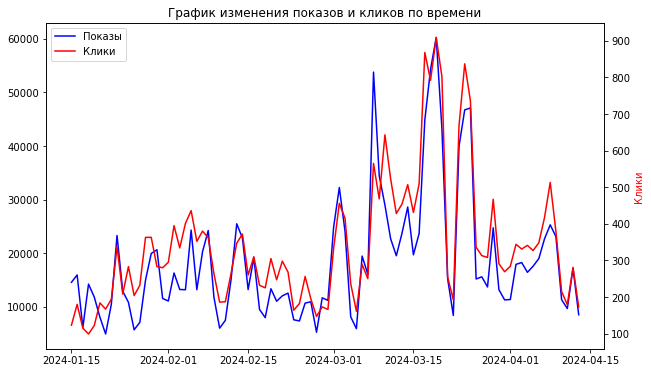

In [8]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(10, 6))  # —à–∏—Ä–∏–Ω–∞, –≤—ã—Å–æ—Ç–∞

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è shows
shows_line = plt.plot(df['date'], df['shows'], color='blue', label='–ü–æ–∫–∞–∑—ã')

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤—Ç–æ—Ä–æ–π –æ—Å–∏ –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–∞ clicks
ax2 = plt.twinx()
clicks_line = ax2.plot(df['date'], df['clicks'], color='red', label='–ö–ª–∏–∫–∏')

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–π –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Å–µ–π —Å –æ–±–µ–∏—Ö —Å—Ç–æ—Ä–æ–Ω
plt.ylabel('–ü–æ–∫–∞–∑—ã', color='blue')
ax2.set_ylabel('–ö–ª–∏–∫–∏', color='red')

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–π –æ—Å–µ–π x –∏ –∑–∞–≥–æ–ª–æ–≤–∫–∞
plt.xlabel('–î–∞—Ç–∞')
plt.title('–ì—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è –ø–æ–∫–∞–∑–æ–≤ –∏ –∫–ª–∏–∫–æ–≤ –ø–æ –≤—Ä–µ–º–µ–Ω–∏')

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ª–µ–≥–µ–Ω–¥—ã
plt.legend([shows_line[0], clicks_line[0]], ['–ü–æ–∫–∞–∑—ã', '–ö–ª–∏–∫–∏'], loc='upper left')

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()




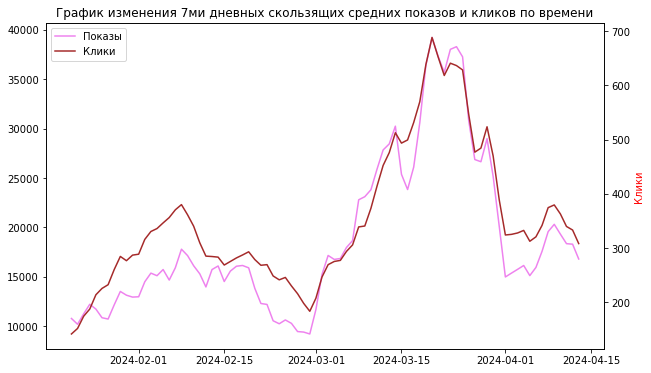

In [9]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(10, 6))  # —à–∏—Ä–∏–Ω–∞, –≤—ã—Å–æ—Ç–∞

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è shows
shows_line = plt.plot(df['date'], df['shows_7'], color='violet', label='–ü–æ–∫–∞–∑—ã_7')
# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤—Ç–æ—Ä–æ–π –æ—Å–∏ –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–∞ clicks
ax2 = plt.twinx()
clicks_line = ax2.plot(df['date'], df['clicks_7'], color='brown', label='–ö–ª–∏–∫–∏_7')
# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–π –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Å–µ–π —Å –æ–±–µ–∏—Ö —Å—Ç–æ—Ä–æ–Ω
plt.ylabel('–ü–æ–∫–∞–∑—ã', color='blue')
ax2.set_ylabel('–ö–ª–∏–∫–∏', color='red')

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–π –æ—Å–µ–π x –∏ –∑–∞–≥–æ–ª–æ–≤–∫–∞
plt.xlabel('–î–∞—Ç–∞')
plt.title('–ì—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è 7–º–∏ –¥–Ω–µ–≤–Ω—ã—Ö —Å–∫–æ–ª—å–∑—è—â–∏—Ö —Å—Ä–µ–¥–Ω–∏—Ö –ø–æ–∫–∞–∑–æ–≤ –∏ –∫–ª–∏–∫–æ–≤ –ø–æ –≤—Ä–µ–º–µ–Ω–∏')

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ª–µ–≥–µ–Ω–¥—ã
plt.legend([shows_line[0], clicks_line[0]], ['–ü–æ–∫–∞–∑—ã', '–ö–ª–∏–∫–∏'], loc='upper left')

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()


–ü–†–û–ú–ï–ñ–£–¢–û–ß–ù–´–ô –í–´–í–û–î:
- –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –∫–ª–∏–∫–∞–º–∏ –∏ –ø–æ–∫–∞–∑–∞–º–∏ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–∞—è, –Ω–æ –Ω–µ –ª–∏–Ω–µ–π–Ω–∞—è
- –ó–∞–º–µ—Ç–Ω—ã –∏–∑–º–Ω–µ–Ω–∏—è –ø—Ä–æ–ø–æ—Ä—Ü–∏–π –ø–æ–∫–∞–∑—ã/–∫–ª–∏–∫–∏ –≤ —Ä–∞–∑–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã –≤—Ä–µ–º–µ–Ω–∏ 


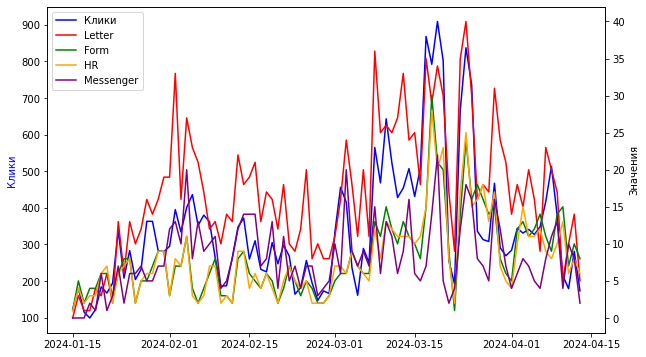

In [10]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞
def set_size(width, height, ax=None):
    """–£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞"""
    if not ax:
        fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    plt.close(fig)
    return ax

# –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 6)  # –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞
ax1.plot(df['date'], df['clicks'], color='blue', label='–ö–ª–∏–∫–∏')
ax1.set_ylabel('–ö–ª–∏–∫–∏', color='blue')

# –°–æ–∑–¥–∞–Ω–∏–µ –≤—Ç–æ—Ä–æ–π –æ—Å–∏
ax2 = ax1.twinx()
ax2.plot(df['date'], df['letter'], color='red', label='Letter')
ax2.plot(df['date'], df['form'], color='green', label='Form')
ax2.plot(df['date'], df['hr'], color='orange', label='HR')
ax2.plot(df['date'], df['messenger'], color='purple', label='Messenger')
ax2.set_ylabel('–ó–Ω–∞—á–µ–Ω–∏—è', color='black')

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –ª–µ–≥–µ–Ω–¥—ã
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()


In [11]:
#–°–æ–∑–¥–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é: —Å—É–º–º—É –≤—Å–µ—Ö –≤–∏–¥–æ–≤ —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π

df['all_actions'] = df['letter'] + df['form'] + df['hr'] + df['messenger']

In [12]:
df['clicks_dev10'] = df['clicks']/10
df['shows_dev1000'] = df['shows']/1000

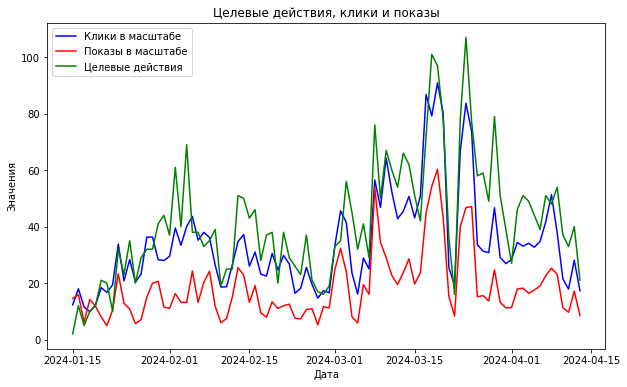

In [135]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(10, 6))

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è clicks_dev10
plt.plot(df['date'], df['clicks_dev10'], color='blue', label='–ö–ª–∏–∫–∏ –≤ –º–∞—Å—à—Ç–∞–±–µ')

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è shows_dev1000
plt.plot(df['date'], df['shows_dev1000'], color='red', label='–ü–æ–∫–∞–∑—ã –≤ –º–∞—Å—à—Ç–∞–±–µ')

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è all_actions
plt.plot(df['date'], df['all_actions'], color='green', label='–¶–µ–ª–µ–≤—ã–µ –¥–µ–π—Å—Ç–≤–∏—è')

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏—è –æ—Å–µ–π –∏ –∑–∞–≥–æ–ª–æ–≤–∫–∞
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏—è')
plt.title('–¶–µ–ª–µ–≤—ã–µ –¥–µ–π—Å—Ç–≤–∏—è, –∫–ª–∏–∫–∏ –∏ –ø–æ–∫–∞–∑—ã')

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ª–µ–≥–µ–Ω–¥—ã
plt.legend()

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()


–ü–†–û–ú–ï–ñ–£–¢–û–ß–ù–´–ï –í–´–í–û–î–´:
- –ø–æ—Å–ª–µ–¥–Ω–∏–π –≥—Ä–∞—Ñ–∏–∫ - –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ–∫–∞–∑–æ–≤, –∫–ª–∏–∫–æ–≤ –∏ –≤—Å–µ—Ö –≤–∏–¥–æ–≤ —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π. –í–∏–¥–∏–º —Å–∏–ª—å–Ω—É—é, –Ω–æ –Ω–µ –ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å
- –ø–æ –¥–∞–Ω–Ω—ã–º –º–µ–Ω–µ–¥–∂–µ—Ä–∞ –≤–æ –≤—Ç–æ—Ä–æ–π –ø–æ–ª–æ–≤–∏–Ω–µ –º–∞—Ä—Ç–∞ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏–ª–æ –æ–±—É—á–µ–Ω–∏–µ –Ω–æ–≤–æ–π –†–ö. –í–∏–¥–Ω–æ, —á—Ç–æ —Å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –º–æ–º–µ–Ω—Ç–∞ —É–≤–µ–ª–∏—á–∏–ª—Å—è —Ä–∞–∑—Ä—ã–≤ –º–µ–∂–¥—É –∫–ª–∏–∫–∞–º–∏ –∏ —Ü–µ–ª–µ–≤—ã–º–∏ –¥–µ–π—Å—Ç–≤–∏—è–º–∏. –†–ö —Å—Ç–∞–ª–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–µ–µ.
- –æ—Ç–¥–µ–ª—å–Ω—ã–µ –≤–∏–¥—ã –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–µ–π –∏–º–µ—é—Ç —Å—Ö–æ–∂–∏–µ, –Ω–æ –Ω–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–æ–≤–ø–∞–¥–∞—é—â–∏–µ —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏. 


In [14]:
df['date'] = pd.to_datetime(df['date'])

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ 'clicks' —Å–¥–≤–∏–≥–æ–º –Ω–∞ 1 –¥–µ–Ω—å
df['clicks_shifted'] = df['clicks'].shift(1)
df['shows_shifted'] = df['shows'].shift(1)

#### CORRELATION ANALYSIS



In [15]:
df_temp = df.drop(columns=['date'])

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã
correlation_matrix = df_temp.corr()

# –í—ã–≤–æ–¥ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã
print(correlation_matrix.round(2))

                 shows  clicks   sum  price per click  deep  letter  form  \
shows             1.00    0.92  0.50            -0.30 -0.09    0.72  0.72   
clicks            0.92    1.00  0.50            -0.43 -0.13    0.84  0.76   
sum               0.50    0.50  1.00             0.48  0.11    0.42  0.43   
price per click  -0.30   -0.43  0.48             1.00  0.36   -0.45 -0.32   
deep             -0.09   -0.13  0.11             0.36  1.00   -0.13 -0.01   
letter            0.72    0.84  0.42            -0.45 -0.13    1.00  0.62   
form              0.72    0.76  0.43            -0.32 -0.01    0.62  1.00   
hr                0.72    0.78  0.45            -0.33 -0.01    0.66  0.97   
messenger         0.53    0.60  0.27            -0.36 -0.18    0.71  0.43   
shows_7           0.64    0.69  0.38            -0.31 -0.12    0.64  0.70   
clicks_7          0.59    0.69  0.41            -0.28 -0.15    0.64  0.67   
all_actions       0.79    0.89  0.47            -0.44 -0.10    0.91  0.86   

–ü–†–û–ú–ï–ñ–£–¢–û–ß–ù–´–ï –í–´–í–û–î–´:
- –ü–æ–∫–∞–∑—ã –∏ –∫–ª–∏–∫–∏ –∏–º–µ—é—Ç –≤—ã—Å–æ–∫—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é 0,92
- –∫–ª–∏–∫–∏ –∏ —Ü–µ–ª–µ–≤—ã–µ –¥–µ–π—Å—Ç–≤–∏—è —Å—É–º–º–∞—Ä–Ω—ã–µ —Ç–∞–∫ –∂–µ 0,89 
–ø—Ä–∏ —ç—Ç–æ–º –æ—Ç–¥–µ–ª—å–Ω—ã–µ –≤–∏–¥—ã —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å–≤—Ç–∏–π –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–µ–Ω—å—à–µ. 
- –°–∞–º–æ–µ –Ω–∏–∑–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ - —É –º–µ—Å—Å–µ–Ω–¥–µ–∂—Ä–æ–≤ 0,6 –æ—Ç –∫–ª–∏–∫–æ–≤
- –ü—Ä–æ—Å–ª–µ–∂–∏–≤–∞—é—Ç—Å—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –¥–Ω—è: 0,63 –ø–æ –ø–æ–∫–∞–∑–∞–º –∏ 0,72 –ø–æ –∫–ª–∏–∫–∞–º. –¢.–µ. —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏ –º–æ–≥—É—Ç –∂–∏—Ç—å –Ω–µ –º–µ–Ω–µ–µ 2—Ö –¥–Ω–µ–π –∏–ª–∏ –∏–º–µ—é—Ç—Å—è –≤–ª–∏—è–Ω–∏—è –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –¥–Ω–µ–π (–∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ –¥–ª—è –∫–ª–∏–∫–æ–≤ —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –≤—ã—à–µ, —Ç.–µ. —ç—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ –≤ –ø–æ—Å–ª–µ–¥—É—é—â–∏–µ –¥–Ω–∏ –ª—é–¥–∏ –¥–µ–ª–∞—é—Ç –¥–æ–ø —Ü–µ–ª–µ–≤—ã–µ –¥–µ–π—Å—Ç–≤–∏—è)
- –ì–ª—É–±–∏–Ω–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –Ω–∏ –æ—Ç —á–µ–≥–æ –Ω–µ –∑–∞–≤–∏—Å–∏—Ç. 
–ö–∞–∫ –≤–∏–¥–Ω–æ –±—ã–ª–æ —Ä–∞–Ω—å—à–µ –∏–º–µ–µ—Ç –Ω–∏–∑–∫–æ–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ
- hr –∏ —Ñ–æ—Ä–º—ã –∏–º–µ—é—Ç –ø–æ—á—Ç–∏ –ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å, –º–µ—Å—Å–µ–Ω–¥–∂–µ—Ä –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å –ø–∏—Å—å–º–∞–º–∏


In [16]:
df['weekday'] = df['date'].dt.dayofweek

In [17]:
#–ü—Ä–æ–≤–µ—Ä—è–µ–º –≤–ª–∏—è–Ω–∏–µ –¥–Ω—è –Ω–µ–¥–µ–ª–∏ –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏

dff = df.drop(columns=['date'])

# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ –¥–Ω—é –Ω–µ–¥–µ–ª–∏ –∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–∏—Ö –¥–ª—è –≤—Å–µ—Ö –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
grouped_means = dff.groupby('weekday').mean()

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print(grouped_means.round(1))

           shows  clicks     sum  price per click  deep  letter  form   hr  \
weekday                                                                      
0        21333.8   381.8  1541.7              5.0   1.8    16.3   8.2  7.4   
1        19734.5   342.4  1340.4              4.4   1.8    16.9   8.9  8.3   
2        17600.6   325.4  1337.1              4.9   1.8    16.0   9.3  9.5   
3        15143.2   274.8  1192.7              5.2   1.8    13.9   7.3  6.8   
4        18337.6   311.9  1101.3              3.7   1.8    17.8   7.5  7.5   
5        17083.5   327.9  1137.9              3.9   1.7    15.2   7.5  7.4   
6        19808.5   420.7  1251.0              3.5   1.9    22.4   9.4  9.2   

         messenger  shows_7  clicks_7  all_actions  clicks_dev10  \
weekday                                                            
0              8.4  18731.7     348.0         40.3          38.2   
1              8.3  18817.0     350.4         42.5          34.2   
2              6.8  18879

–ü–†–û–ú–ï–ñ–£–¢–û–ß–ù–´–ï –í–´–í–û–î–´:
- –°–∞–º—ã–π –∞–∫—Ç–∏–≤–Ω—ã–π –¥–µ–Ω—å –ø–æ –ø–æ–∫–∞–∑–∞–º - –ø–Ω, –ø–æ –∫–ª–∏–∫–∞–º - –≤—Å
- –∞–∫—Ç–∏–≤–Ω—ã–π –ø–µ—Ä–∏–æ–¥ –ø–æ–∫–∞–∑–æ–≤ –∏ –∫–ª–∏–∫–æ–≤: –≤—Å-–≤—Ç
- —Å–∞–º–∞—è –≤—ã—Å–æ–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—å –≤ –≤—Å

#### PR ACTIVITY

In [18]:
excel_file = 'C:/Users/OLEG/Jupyter/Gold/pr_short.xlsx'
df_pr = pd.read_excel(excel_file)
df_pr.head()

social_network                               name  subscribers  price  \
0             tg                            –ì–µ–æ–ª–æ–≥–∏          587    200   
1             tg                        –ì–µ–æ–í–∞–∫–∞–Ω—Å–∏—è         4163      0   
2             tg  –°–∞–º–æ—Å–≤–∞–ª—ã –°–ü–ë. –ù–µ—Ä—É–¥–Ω—ã–µ –º–∞—Ç–µ—Ä–∏–∞–ª—ã         2700   1500   
3             tg                      –°–º–µ–ª—ã–π –ì–µ–æ–ª–æ–≥          963    500   
4             tg             –ë—É—Ä—è—Ç–∏—è. –î–∞–ª—å—à–µ –Ω–µ–∫—É–¥–∞         1661   5000   

        date  
0 2024-03-27  
1 2024-03-27  
2 2024-03-27  
3 2024-03-27  
4 2024-03-28

In [19]:
#–°–æ–∑–¥–∞–µ–º —Ç–∞–±–ª–∏—Ü—É Pr –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –ø–æ –¥–Ω—è–º, —Å—á–∏—Ç–∞–µ–º —á–∏—Å–ª–æ –ø—É–±–ª–∏–∫–∞—Ü–∏–π 
#–∏ —Å—É–º–º–∞—Ä–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–Ω—è


grouped_pr = df_pr.groupby('date').agg({'subscribers': 'sum', 'price': 'sum', 'name': 'size'})

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print(grouped_pr.round(1))

            subscribers  price  name
date                                
2024-02-04        78462  10000     1
2024-02-27        44000      0     1
2024-03-27        27413   3200     5
2024-03-28         7329   5000     2
2024-04-02         7900      0     1
2024-04-03        23000   1400     1
2024-04-04        12907   6500     2
2024-04-05         4713      0     1
2024-04-08       110059    200     2
2024-04-09        97797   2000     2
2024-04-10       482629   2100     2


In [20]:
# –î–µ–ª–∞–µ–º –æ–±—â—É—é —Ç–∞–±–ª–∏—Ü—É
# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ DataFrame –ø–æ –¥–∞—Ç–µ —Å –ª–µ–≤—ã–º –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ–º
df = pd.merge(df, grouped_pr, how='left', on='date')
df.head()

shows  clicks      sum  price per click  deep  letter  form  hr  messenger  \
0  14553     123  1747.88            14.21  1.77       0     1   1          0   
1  15920     180   800.00             4.44  2.13       3     5   4          0   
2   6098     115   876.32             7.62  1.71       1     2   2          0   
3  14214      99  1493.44            15.09  2.85       1     4   3          2   
4  11814     122   910.00             7.46  1.94       4     4   3          1   

        date  ...  clicks_7  all_actions  clicks_dev10  shows_dev1000  \
0 2024-01-15  ...       NaN            2          12.3         14.553   
1 2024-01-16  ...       NaN           12          18.0         15.920   
2 2024-01-17  ...       NaN            5          11.5          6.098   
3 2024-01-18  ...       NaN           10           9.9         14.214   
4 2024-01-19  ...       NaN           12          12.2         11.814   

   clicks_shifted  shows_shifted  weekday  subscribers  price  name  
0             NaN            NaN        0          NaN    NaN   NaN  
1           123.0        14553.0        1          NaN    NaN   NaN  
2           180.0        15920.0        2          NaN    NaN   NaN  
3           115.0         6098.0        3          NaN    NaN   NaN  
4            99.0        14214.0        4          NaN    NaN   NaN  

[5 rows x 21 columns]

In [22]:
df['subscribers'] = df['subscribers'].fillna(0)
df['name'] = df['name'].fillna(0)

In [136]:
print('–°—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ –ø–æ –∫–∞–Ω–∞–ª–∞–º –∑–∞ –¥–µ–Ω—å')
df['subscribers'].mean()

–°—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ –ø–æ –∫–∞–Ω–∞–ª–∞–º –∑–∞ –¥–µ–Ω—å


9957.877777777778

In [24]:
df['subscribers_div10000'] = df['subscribers']/10000

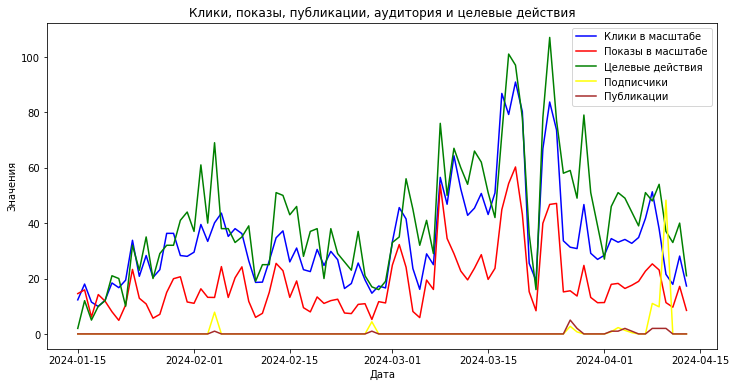

In [137]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(12, 6))

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è clicks_dev10
plt.plot(df['date'], df['clicks_dev10'], color='blue', label='–ö–ª–∏–∫–∏ –≤ –º–∞—Å—à—Ç–∞–±–µ')

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è shows_dev1000
plt.plot(df['date'], df['shows_dev1000'], color='red', label='–ü–æ–∫–∞–∑—ã –≤ –º–∞—Å—à—Ç–∞–±–µ')

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è all_actions
plt.plot(df['date'], df['all_actions'], color='green', label='–¶–µ–ª–µ–≤—ã–µ –¥–µ–π—Å—Ç–≤–∏—è')

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è all_actions
plt.plot(df['date'], df['subscribers_div10000'], color='yellow', label='–ü–æ–¥–ø–∏—Å—á–∏–∫–∏')
plt.plot(df['date'], df['name'], color='brown', label='–ü—É–±–ª–∏–∫–∞—Ü–∏–∏')
# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏—è –æ—Å–µ–π –∏ –∑–∞–≥–æ–ª–æ–≤–∫–∞
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏—è')
plt.title('–ö–ª–∏–∫–∏, –ø–æ–∫–∞–∑—ã, –ø—É–±–ª–∏–∫–∞—Ü–∏–∏, –∞—É–¥–∏—Ç–æ—Ä–∏—è –∏ —Ü–µ–ª–µ–≤—ã–µ –¥–µ–π—Å—Ç–≤–∏—è')

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ª–µ–≥–µ–Ω–¥—ã
plt.legend()

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()


In [26]:
df['subscribers_shifted1'] = df['subscribers'].shift(1)
df['subscribers_shifted3'] = df['subscribers'].shift(3)

df_temp = df.drop(columns=['date'])

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã
correlation_matrix = df_temp.corr()

# –í—ã–≤–æ–¥ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã
print(correlation_matrix.round(2))

                      shows  clicks   sum  price per click  deep  letter  \
shows                  1.00    0.92  0.50            -0.30 -0.09    0.72   
clicks                 0.92    1.00  0.50            -0.43 -0.13    0.84   
sum                    0.50    0.50  1.00             0.48  0.11    0.42   
price per click       -0.30   -0.43  0.48             1.00  0.36   -0.45   
deep                  -0.09   -0.13  0.11             0.36  1.00   -0.13   
letter                 0.72    0.84  0.42            -0.45 -0.13    1.00   
form                   0.72    0.76  0.43            -0.32 -0.01    0.62   
hr                     0.72    0.78  0.45            -0.33 -0.01    0.66   
messenger              0.53    0.60  0.27            -0.36 -0.18    0.71   
shows_7                0.64    0.69  0.38            -0.31 -0.12    0.64   
clicks_7               0.59    0.69  0.41            -0.28 -0.15    0.64   
all_actions            0.79    0.89  0.47            -0.44 -0.10    0.91   
clicks_dev10

–ê–ù–ê–õ–ò–¢–ò–ö–ê –ü–û PR –ê–ö–¢–ò–í–ù–û–°–¢–ò

–°–ª–∞–±–∞—è —Å–≤—è–∑—å –∑–∞–º–µ—á–µ–Ω–∞ —Ç–æ–ª—å–∫–æ –º–µ–∂–¥—É –ø—É–±–ª–∏–∫–∞—Ü–∏—è–º–∏ –∏ –∑–∞–ø–æ–ª–µ–Ω–∏–µ–º —Ñ–æ—Ä–º—ã –∏ –æ–±—Ä–∞—â–µ–Ω–∏–µ–º –≤ hr –≤ –¥–µ–Ω—å –ø—É–±–ª–∏–∫–∞—Ü–∏–∏
–ß–∏—Å–ª–æ –ø—É–±–ª–∏–∫–∞—Ü–∏–π –∏–º–µ–µ—Ç –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π —á–µ–º —Å—É–º–º–∞—Ä–Ω–æ–µ —á–∏—Å–ª–æ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ —É –∫–∞–Ω–∞–ª–æ–≤ –∑–∞ –¥–µ–Ω—å. –≠—Ç–æ –º–æ–∂–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ —Ç–æ–º, —á—Ç–æ –∞–∫—Ç–∏–≤–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –∫–∞–Ω–∞–ª–æ–≤ –Ω–µ –∑–∞–≤–∏—Å—è—Ç –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ –∫–∞–Ω–∞–ª–æ–≤ (—ç—Ç–æ –º–æ–≥—É—Ç –±—ã—Ç—å –±–æ—Ç—ã –∏–ª–∏ –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏).

#### ANALYSIS DIFFERENT TYPES OF VISITS

–ò—Å–ø–æ–ª—å–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ –æ –ø–æ–≤–µ–¥–µ–Ω–∏–∏ –ø–æ—Å–µ—Ç–∏—Ç–µ–ª–µ–π —Å–∞–π—Ç–æ–≤: –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ç–æ–º, –æ—Ç–∫—É–¥–∞ –æ–Ω–∏ –ø—Ä–∏—Ö–æ–¥—è—Ç –Ω–∞ —Å–∞–π—Ç

In [27]:
excel_file = 'C:/Users/OLEG/Jupyter/Gold/type.xlsx'
df_type = pd.read_excel(excel_file)
df_type.head()

date  ads  search  direct  intro  so_net
0  2024-01-16  155      43       6      1       0
1  2024-01-17   88      62       7      4       0
2  2024-01-18   57      35       9      2       1
3  2024-01-19   75      42      12      2       4
4  2024-01-20  129      23       3      1       4

In [28]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    91 non-null     object
 1   ads     91 non-null     int64 
 2   search  91 non-null     int64 
 3   direct  91 non-null     int64 
 4   intro   91 non-null     int64 
 5   so_net  91 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.4+ KB


In [29]:
df_type['date'] = pd.to_datetime(df_type['date'], format='%Y.%m.%d')
df_type.head()

date  ads  search  direct  intro  so_net
0 2024-01-16  155      43       6      1       0
1 2024-01-17   88      62       7      4       0
2 2024-01-18   57      35       9      2       1
3 2024-01-19   75      42      12      2       4
4 2024-01-20  129      23       3      1       4

In [30]:
df = pd.merge(df, df_type, how='left', on='date')
df.head()

shows  clicks      sum  price per click  deep  letter  form  hr  messenger  \
0  14553     123  1747.88            14.21  1.77       0     1   1          0   
1  15920     180   800.00             4.44  2.13       3     5   4          0   
2   6098     115   876.32             7.62  1.71       1     2   2          0   
3  14214      99  1493.44            15.09  2.85       1     4   3          2   
4  11814     122   910.00             7.46  1.94       4     4   3          1   

        date  ...  price  name  subscribers_div10000  subscribers_shifted1  \
0 2024-01-15  ...    NaN   0.0                   0.0                   NaN   
1 2024-01-16  ...    NaN   0.0                   0.0                   0.0   
2 2024-01-17  ...    NaN   0.0                   0.0                   0.0   
3 2024-01-18  ...    NaN   0.0                   0.0                   0.0   
4 2024-01-19  ...    NaN   0.0                   0.0                   0.0   

   subscribers_shifted3    ads  search  direct  intro  so_net  
0                   NaN    NaN     NaN     NaN    NaN     NaN  
1                   NaN  155.0    43.0     6.0    1.0     0.0  
2                   NaN   88.0    62.0     7.0    4.0     0.0  
3                   0.0   57.0    35.0     9.0    2.0     1.0  
4                   0.0   75.0    42.0    12.0    2.0     4.0  

[5 rows x 29 columns]

In [32]:
df['all_visits'] = df[['ads', 'search', 'direct', 'intro', 'so_net']].sum(axis=1)

In [33]:
df_temp = df.drop(columns=['sum', 'price per click', 'weekday', 
                           'subscribers_div10000', 'clicks_dev10', 'shows_dev1000', 'date'])

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã
correlation_matrix = df_temp.corr()

# –í—ã–≤–æ–¥ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã
print(correlation_matrix.round(2))

                      shows  clicks  deep  letter  form    hr  messenger  \
shows                  1.00    0.92 -0.09    0.72  0.72  0.72       0.53   
clicks                 0.92    1.00 -0.13    0.84  0.76  0.78       0.60   
deep                  -0.09   -0.13  1.00   -0.13 -0.01 -0.01      -0.18   
letter                 0.72    0.84 -0.13    1.00  0.62  0.66       0.71   
form                   0.72    0.76 -0.01    0.62  1.00  0.97       0.43   
hr                     0.72    0.78 -0.01    0.66  0.97  1.00       0.43   
messenger              0.53    0.60 -0.18    0.71  0.43  0.43       1.00   
shows_7                0.64    0.69 -0.12    0.64  0.70  0.72       0.33   
clicks_7               0.59    0.69 -0.15    0.64  0.67  0.69       0.31   
all_actions            0.79    0.89 -0.10    0.91  0.86  0.88       0.74   
clicks_shifted         0.62    0.72 -0.10    0.59  0.71  0.68       0.39   
shows_shifted          0.63    0.65 -0.04    0.48  0.67  0.63       0.33   
subscribers 

- –ø–µ—Ä–µ—Ö–æ–¥—ã –ø–æ —Ä–µ–∫–ª–∞–º–µ –ø–æ—á—Ç–∏ –ª–∏–Ω–µ–π–Ω–æ –∑–∞–≤–∏—Å—è—Ç –æ—Ç –∫–ª–∏–∫–æ–≤ –ø–æ —Ä–µ–∫–ª–∞–º–µ (—Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ –æ–¥–Ω–æ –∏ —Ç–æ–∂–µ, –∑–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç–∏ –∏–∑–º–µ—Ä–µ–Ω–∏—è)
- pr (—á–∏—Å–ª–æ –ø—É–±–ª–∏–∫–∞—Ü–∏–π) –≤–ª–∏—è–µ—Ç –Ω–∞ –ø—Ä—è–º—ã–µ –ø–µ—Ä–µ—Ö–æ–¥—ã –∏ –ø–µ—Ä–µ—Ö–æ–¥—ã –∏–∑ —Å–æ—Ü —Å–µ—Ç–µ–π
- –ø–µ—Ä–µ—Ö–æ–¥—ã –ø–æ –ø–æ–∏—Å–∫—É —Å–ª–∞–±–æ —Å–≤—è–∑–∞–Ω—ã —Å –∫–∞–∫–∏–º-–ª–∏–±–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º, –∫—Ä–æ–º–µ –ø—Ä—è–º—ã—Ö –ø–µ—Ä–µ—Ö–æ–¥–æ–≤ (–≤–æ–∑–º–æ–∂–Ω–æ, —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤ –∑–∞–∫–ª–∞–¥–∫–∞—Ö –∏ –ø–æ–≤—Ç–æ—Ä–Ω—ã–π –≤–∏–∑–∏—Ç –≤ —Ç–æ—Ç –∂–µ –¥–µ–Ω—å) 
- –ø—Ä—è–º—ã–µ –∑–∞—Ö–æ–¥—ã –∏–º–µ—é—Ç –Ω–µ–∫–æ—Ç–æ—Ä—É—é –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ–º —Ñ–æ—Ä–º –∏ –∑–∞–ø—Ä–æ—Å–æ–º –≤ HR. –°—Ä–µ–¥–Ω—è—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å –∑–∞—Ö–æ–¥–æ–º –∏–∑ —Å–æ—Ü —Å–µ—Ç–µ–π
- –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ –ø–µ—Ä–µ—Ö–æ–¥—ã –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–∏ —Å —á–µ–º –Ω–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç
- –ø–µ—Ä–µ—Ö–æ–¥—ã –∏–∑ —Å–æ—Ü —Å–µ—Ç–µ–π –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å —á–∏—Å–ª–æ–º –ø—É–±–ª–∏–∫–∞—Ü–∏–π –≤ –¥–µ–Ω—å, —Å–ª–∞–±–µ–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å —á–∏—Å–ª–æ–º –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ –≤ —Å–æ—Ü —Å–µ—Ç—è—Ö –≤ —Ç–µ—á–µ–Ω–∏–µ 2—Ö –¥–Ω–µ–π –∏ –∏–º–µ—é—Ç —Å–ª–∞–±—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å —Ü–µ–ª–µ–≤—ã–º–∏ –¥–µ–π—Å—Ç–≤–∏—è–º–∏. –¢.–µ. –≤ —Å—Ä–µ–¥–Ω–µ–º –ø—É–±–ª–∏–∫–∞—Ü–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç –≤  —Ç–µ—á–µ–Ω–∏–µ 2—Ö –¥–Ω–µ–π

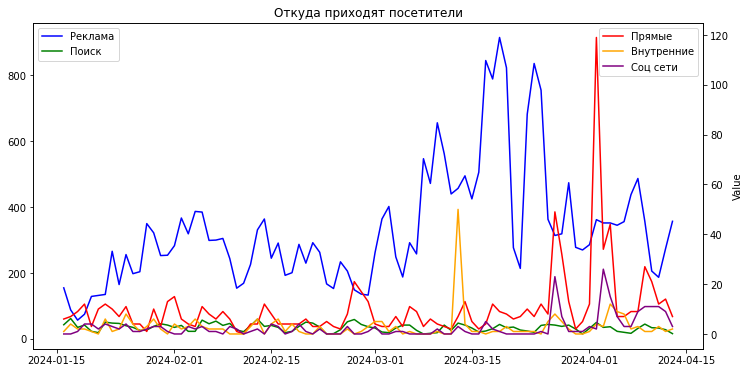

In [138]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(12, 6))

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è ads –∏ search
plt.plot(df['date'], df['ads'], label='–†–µ–∫–ª–∞–º–∞', color='blue')
plt.plot(df['date'], df['search'], label='–ü–æ–∏—Å–∫', color='green')
plt.legend(loc='upper left')  # –õ–µ–≥–µ–Ω–¥–∞ –¥–ª—è ads –∏ search

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–∞–≤–æ–π —à–∫–∞–ª—ã
plt.twinx()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è direct, intro, so_net
plt.plot(df['date'], df['direct'], label='–ü—Ä—è–º—ã–µ', color='red')
plt.plot(df['date'], df['intro'], label='–í–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ', color='orange')
plt.plot(df['date'], df['so_net'], label='–°–æ—Ü —Å–µ—Ç–∏', color='purple')
plt.legend(loc='upper right')  # –õ–µ–≥–µ–Ω–¥–∞ –¥–ª—è direct, intro –∏ so_net

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–π –æ—Å–µ–π –∏ –∑–∞–≥–æ–ª–æ–≤–∫–∞
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('–û—Ç–∫—É–¥–∞ –ø—Ä–∏—Ö–æ–¥—è—Ç –ø–æ—Å–µ—Ç–∏—Ç–µ–ª–∏')

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()


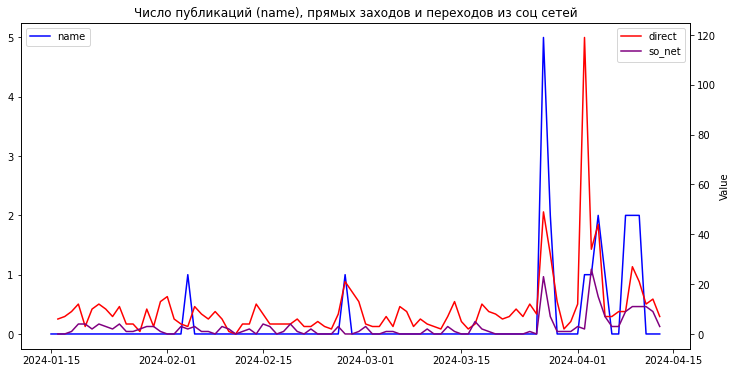

In [124]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(12, 6))

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è ads –∏ search
plt.plot(df['date'], df['name'], label='name', color='blue')

plt.legend(loc='upper left')  # –õ–µ–≥–µ–Ω–¥–∞ –¥–ª—è ads –∏ search

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–∞–≤–æ–π —à–∫–∞–ª—ã
plt.twinx()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è direct, intro, so_net
plt.plot(df['date'], df['direct'], label='direct', color='red')
plt.plot(df['date'], df['so_net'], label='so_net', color='purple')
plt.legend(loc='upper right')  # –õ–µ–≥–µ–Ω–¥–∞ –¥–ª—è direct, intro –∏ so_net

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–π –æ—Å–µ–π –∏ –∑–∞–≥–æ–ª–æ–≤–∫–∞
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('–ß–∏—Å–ª–æ –ø—É–±–ª–∏–∫–∞—Ü–∏–π (name), –ø—Ä—è–º—ã—Ö –∑–∞—Ö–æ–¥–æ–≤ –∏ –ø–µ—Ä–µ—Ö–æ–¥–æ–≤ –∏–∑ —Å–æ—Ü —Å–µ—Ç–µ–π')

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

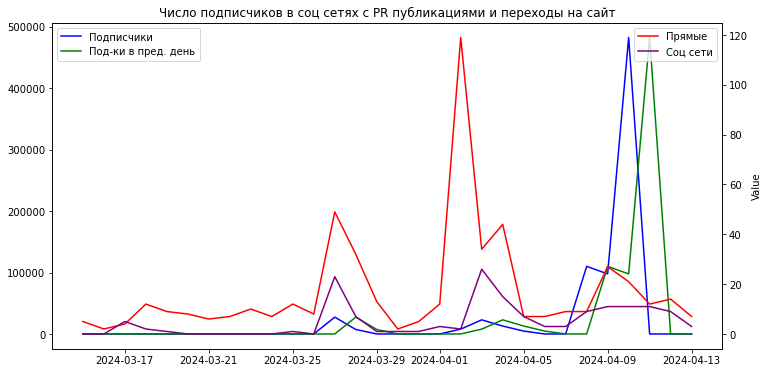

In [140]:

df_filtered = df[df['date'] >= '2024-03-15']

# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(12, 6))

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è subscribers –∏ subscribers_shifted1
plt.plot(df_filtered['date'], df_filtered['subscribers'], label='–ü–æ–¥–ø–∏—Å—á–∏–∫–∏', color='blue')
plt.plot(df_filtered['date'], df_filtered['subscribers_shifted1'], label='–ü–æ–¥-–∫–∏ –≤ –ø—Ä–µ–¥. –¥–µ–Ω—å', color='green')
plt.legend(loc='upper left')  # –õ–µ–≥–µ–Ω–¥–∞ –¥–ª—è subscribers –∏ subscribers_shifted1

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–∞–≤–æ–π —à–∫–∞–ª—ã
plt.twinx()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è direct –∏ so_net
plt.plot(df_filtered['date'], df_filtered['direct'], label='–ü—Ä—è–º—ã–µ', color='red')
plt.plot(df_filtered['date'], df_filtered['so_net'], label='–°–æ—Ü —Å–µ—Ç–∏', color='purple')
plt.legend(loc='upper right')  # –õ–µ–≥–µ–Ω–¥–∞ –¥–ª—è direct –∏ so_net

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–π –æ—Å–µ–π –∏ –∑–∞–≥–æ–ª–æ–≤–∫–∞
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('–ß–∏—Å–ª–æ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ –≤ —Å–æ—Ü —Å–µ—Ç—è—Ö —Å PR –ø—É–±–ª–∏–∫–∞—Ü–∏—è–º–∏ –∏ –ø–µ—Ä–µ—Ö–æ–¥—ã –Ω–∞ —Å–∞–π—Ç')

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()


In [141]:
print('–°—Ä–µ–¥–Ω–µ–µ –ø–æ –ø—Ä—è–º—ã–º –∑–∞—Ö–æ–¥–∞–º')
df['direct'].mean()


–°—Ä–µ–¥–Ω–µ–µ –ø–æ –ø—Ä—è–º—ã–º –∑–∞—Ö–æ–¥–∞–º


10.191011235955056

In [142]:
print('–°—Ä–µ–¥–Ω–µ–µ –ø–æ –ø–µ—Ä–µ—Ö–æ–¥–∞–º –∏–∑ —Å–æ—Ü —Å–µ—Ç–µ–π')
df['so_net'].mean()

–°—Ä–µ–¥–Ω–µ–µ –ø–æ –ø–µ—Ä–µ—Ö–æ–¥–∞–º –∏–∑ —Å–æ—Ü —Å–µ—Ç–µ–π


2.6741573033707864

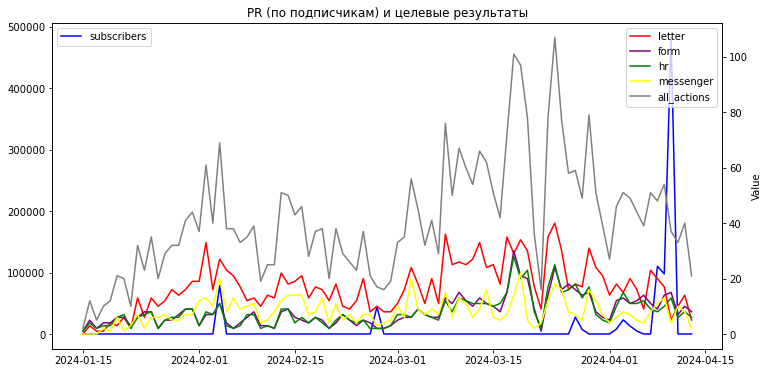

In [40]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(12, 6))

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è ads –∏ search
plt.plot(df['date'], df['subscribers'], label='subscribers', color='blue')
plt.legend(loc='upper left')  # –õ–µ–≥–µ–Ω–¥–∞ –¥–ª—è ads –∏ search

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–∞–≤–æ–π —à–∫–∞–ª—ã
plt.twinx()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è direct, intro, so_net
plt.plot(df['date'], df['letter'], label='letter', color='red')
plt.plot(df['date'], df['form'], label='form', color='purple')
plt.plot(df['date'], df['hr'], label='hr', color='green')
plt.plot(df['date'], df['messenger'], label='messenger', color='yellow')
plt.plot(df['date'], df['all_actions'], label='all_actions', color='grey')         
plt.legend(loc='upper right')  # –õ–µ–≥–µ–Ω–¥–∞ –¥–ª—è direct, intro –∏ so_net

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–π –æ—Å–µ–π –∏ –∑–∞–≥–æ–ª–æ–≤–∫–∞
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('PR (–ø–æ –ø–æ–¥–ø–∏—Å—á–∏–∫–∞–º) –∏ —Ü–µ–ª–µ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã')

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

In [41]:
#–¥–æ–±–∞–≤–∏–º —Å–∫–æ–ª—å–∑—è—â—É—é —Å—Ä–µ–¥–Ω—é—é –¥–ª—è 'all_actions' —á—Ç–æ–±—ã –ª—É—á—à–µ –ø–æ–Ω–∏–º–∞—Ç—å –≤–ª–∏—è–Ω–∏–µ pr —Å–æ–±—ã—Ç–∏–π
df['all_actions_7'] = df['all_actions'].rolling(window=7).mean().round(1)

In [42]:
df[['direct', 'so_net', 'all_actions', 'form', 'hr', 'letter', 'messenger']].mean().round(1)

direct         10.2
so_net          2.7
all_actions    41.3
form            8.3
hr              8.0
letter         16.9
messenger       8.1
dtype: float64

In [43]:
pd.set_option('display.max_rows', None) 
df[['date', 'subscribers', 'name', 'direct', 'so_net', 'all_actions', 'all_actions_7',
    'form', 'hr', 'letter', 'messenger']]

date  subscribers  name  direct  so_net  all_actions  all_actions_7  \
0  2024-01-15          0.0   0.0     NaN     NaN            2            NaN   
1  2024-01-16          0.0   0.0     6.0     0.0           12            NaN   
2  2024-01-17          0.0   0.0     7.0     0.0            5            NaN   
3  2024-01-18          0.0   0.0     9.0     1.0           10            NaN   
4  2024-01-19          0.0   0.0    12.0     4.0           12            NaN   
5  2024-01-20          0.0   0.0     3.0     4.0           21            NaN   
6  2024-01-21          0.0   0.0    10.0     2.0           20           11.7   
7  2024-01-22          0.0   0.0    12.0     4.0           10           12.9   
8  2024-01-23          0.0   0.0    10.0     3.0           32           15.7   
9  2024-01-24          0.0   0.0     7.0     2.0           23           18.3   
10 2024-01-25          0.0   0.0    11.0     4.0           35           21.9   
11 2024-01-26          0.0   0.0     4.0     1.0           20           23.0   
12 2024-01-27          0.0   0.0     4.0     1.0           29           24.1   
13 2024-01-28          0.0   0.0     1.0     2.0           32           25.9   
14 2024-01-29          0.0   0.0    10.0     3.0           32           29.0   
15 2024-01-30          0.0   0.0     3.0     3.0           41           30.3   
16 2024-01-31          0.0   0.0    13.0     1.0           44           33.3   
17 2024-02-01          0.0   0.0    15.0     0.0           37           33.6   
18 2024-02-02          0.0   0.0     6.0     0.0           61           39.4   
19 2024-02-03          0.0   0.0     4.0     3.0           40           41.0   
20 2024-02-04      78462.0   1.0     3.0     2.0           69           46.3   
21 2024-02-05          0.0   0.0    11.0     3.0           38           47.1   
22 2024-02-06          0.0   0.0     8.0     1.0           38           46.7   
23 2024-02-07          0.0   0.0     6.0     1.0           33           45.1   
24 2024-02-08          0.0   0.0     9.0     0.0           35           44.9   
25 2024-02-09          0.0   0.0     6.0     3.0           39           41.7   
26 2024-02-10          0.0   0.0     1.0     2.0           19           38.7   
27 2024-02-11          0.0   0.0     0.0     0.0           25           32.4   
28 2024-02-12          0.0   0.0     4.0     1.0           25           30.6   
29 2024-02-13          0.0   0.0     4.0     2.0           51           32.4   
30 2024-02-14          0.0   0.0    12.0     0.0           50           34.9   
31 2024-02-15          0.0   0.0     8.0     4.0           43           36.0   
32 2024-02-16          0.0   0.0     4.0     3.0           46           37.0   
33 2024-02-17          0.0   0.0     4.0     0.0           28           38.3   
34 2024-02-18          0.0   0.0     4.0     1.0           37           40.0   
35 2024-02-19          0.0   0.0     4.0     4.0           38           41.9   
36 2024-02-20          0.0   0.0     6.0     1.0           20           37.4   
37 2024-02-21          0.0   0.0     3.0     0.0           38           35.7   
38 2024-02-22          0.0   0.0     3.0     2.0           29           33.7   
39 2024-02-23          0.0   0.0     5.0     0.0           26           30.9   
40 2024-02-24          0.0   0.0     3.0     0.0           23           30.1   
41 2024-02-25          0.0   0.0     2.0     0.0           37           30.1   
42 2024-02-26          0.0   0.0     8.0     3.0           21           27.7   
43 2024-02-27      44000.0   1.0    21.0     0.0           17           27.3   
44 2024-02-28          0.0   0.0    17.0     0.0           16           24.1   
45 2024-02-29          0.0   0.0    13.0     1.0           19           22.7   
46 2024-03-01          0.0   0.0     4.0     3.0           33           23.7   
47 2024-03-02          0.0   0.0     3.0     0.0           35           25.4   
48 2024-03-03          0.0   0.0     3.0     0.0           56           28.1   
49 2024-0

In [44]:
#—Å–æ–±–∏—Ä–∞–µ–º –¥–∞–Ω–Ω—ã–µ –≤ —Ç–∞–±–ª–∏—Ü—ã –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ PR –ø–æ—Å—Ç–æ–≤

grouped_df = df.groupby('name').agg({
    'date': 'size',
    'direct': 'sum',
    'so_net': 'sum',
    'all_actions': 'sum',
    'form': 'sum',
    'hr': 'sum',
    'letter': 'sum',
    'messenger': 'sum'
      # –ü–æ–¥—Å—á–µ—Ç —á–∏—Å–ª–∞ —Å—Ç—Ä–æ–∫ –≤ –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø–µ
})

# –ü–µ—Ä–µ–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ —Å —á–∏—Å–ª–æ–º —Å—Ç—Ä–æ–∫
grouped_df = grouped_df.rename(columns={'date': 'days'})

grouped_df['name'] = [0.0, 1.0, 2.0, 5.0]
# –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü 'posts' —Å —É—á–µ—Ç–æ–º —É—Å–ª–æ–≤–∏—è
grouped_df['posts'] = grouped_df.apply(lambda row: row['days'] if row['name'] == 0 else row['name'] * row['days'], axis=1)



# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
print ('–ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ —á–∏—Å–ª—É –ø—É–±–ª–∏–∫–∞—Ü–∏–π –≤ –¥–µ–Ω—å')
print(' ')
print(grouped_df)
print(' ')
print(' ')



grouped_df_divided = grouped_df.div(grouped_df['days'], axis=0).round(1)

print("–ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤ —Ä–∞—Å—á–µ—Ç–µ –Ω–∞ –æ–¥–∏–Ω –¥–µ–Ω—å")
print(' ')
print(grouped_df_divided)
print(' ')
print(' ')


#–≤—ã—á–∏—Å–ª—è–µ–º –ø—Ä–∏—Ä–æ—Å—Ç –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π 
#–≤ –¥–Ω–∏ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Å—Ä–µ–¥–Ω–∏—Ö –ø–æ–∫–∞–∑–∞—Ç–∞–µ–ª–µ–π –≤ –¥–Ω–∏ –±–µ–∑ –ø—É–±–ª–∏–∫–∞—Ü–∏–π

# –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —É–∫–∞–∑–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
selected_columns = ['direct', 'so_net', 'all_actions', 'form', 'hr', 'letter', 'messenger']

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Ä–∞–∑–Ω–∏—Ü—ã –º–µ–∂–¥—É –∫–∞–∂–¥—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –∏ –∑–Ω–∞—á–µ–Ω–∏–µ–º –∏–∑ –ø–µ—Ä–≤–æ–π —Å—Ç—Ä–æ–∫–∏
def calculate_difference(column):
    first_value = column.iloc[0]  # –ó–Ω–∞—á–µ–Ω–∏–µ –∏–∑ –ø–µ—Ä–≤–æ–π —Å—Ç—Ä–æ–∫–∏
    return column.apply(lambda x: x - first_value)  # –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –∫–∞–∂–¥—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –∏ –∑–Ω–∞—á–µ–Ω–∏–µ–º –∏–∑ –ø–µ—Ä–≤–æ–π —Å—Ç—Ä–æ–∫–∏

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∫ –∫–∞–∂–¥–æ–º—É —Å—Ç–æ–ª–±—Ü—É

grouped_df_divided_diff = grouped_df_divided[selected_columns].apply(calculate_difference)
grouped_df_divided_diff['posts'] = grouped_df_divided['posts']


# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print('–ü—Ä–∏—Ä–æ—Å—Ç –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –≤ –¥–Ω–∏ –ø—É–±–ª–∏–∫–∞—Ü–∏–π –≤ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ —Å –¥–Ω—è–º–∏ –±–µ–∑ –ø—É–±–ª–∏–∫–∞—Ü–∏–π')
print('       ')
print(grouped_df_divided_diff)
print(' ')
print(' ')

grouped_df_divided_diff_post = grouped_df_divided_diff.div(grouped_df_divided_diff['posts'], axis=0).round(1)
print("–ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –ø—Ä–∏—Ä–æ—Å—Ç–∞ –≤ —Ä–∞—Å—á–µ—Ç–µ –Ω–∞ –ø—É–±–ª–∏–∫–∞—Ü–∏—é")
print(' ')
print(grouped_df_divided_diff_post.iloc[1:])
print(' ')
print(' ')

–ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ —á–∏—Å–ª—É –ø—É–±–ª–∏–∫–∞—Ü–∏–π –≤ –¥–µ–Ω—å
 
      days  direct  so_net  all_actions  form   hr  letter  messenger  name  \
name                                                                          
0.0     79   541.0   125.0         3191   617  599    1337        638   0.0   
1.0      5   184.0    37.0          227    50   49      86         42   1.0   
2.0      5   133.0    53.0          237    63   55      79         40   2.0   
5.0      1    49.0    23.0           59    16   18      18          7   5.0   

      posts  
name         
0.0    79.0  
1.0     5.0  
2.0    10.0  
5.0     5.0  
 
 
–ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤ —Ä–∞—Å—á–µ—Ç–µ –Ω–∞ –æ–¥–∏–Ω –¥–µ–Ω—å
 
      days  direct  so_net  all_actions  form    hr  letter  messenger  name  \
name                                                                           
0.0    1.0     6.8     1.6         40.4   7.8   7.6    16.9        8.1   0.0   
1.0    1.0    36.8     7.4         45.4  10.0 

–í –¥–Ω–∏ –ø—É–±–ª–∏–∫–∞—Ü–∏–π:
- –†–∞—Å—Ç–µ—Ç —á–∏—Å–ª–æ –ø—Ä—è–º—ã—Ö –ø–µ—Ä–µ—Ö–æ–¥–æ–≤ –∏ –ø–µ—Ä–µ—Ö–æ–¥–æ–≤ –∏–∑ —Å–æ—Ü —Å–µ—Ç–µ–π (–∫—Ä–∞—Ç–Ω–æ)
- –í–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç –æ–±—â–µ–µ —á–∏—Å–ª–æ —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π (–Ω–∞ 10-50%) +5+20 
- –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ —Ñ–æ—Ä–º —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –Ω–∞ 25%-120%, hr –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ, –ø–∏—Å–µ–º –Ω–µ –º–µ–Ω—è–µ—Ç—Å—è –º–µ—Å—Å–µ–Ω–¥–∂–µ—Ä–æ–≤ –Ω–µ –º–µ–Ω—è–µ—Ç—Å—è. 

–ö–∞–∂–¥–∞—è –ø—É–±–ª–∏–∫–∞—Ü–∏—è –¥–∞–µ—Ç:
- 10-30 –ø—Ä—è–º—ã—Ö –∑–∞—Ö–æ–¥–æ–≤, 4-6 –ø–µ—Ä–µ—Ö–æ–¥–æ–≤ –∏–∑ —Å–æ—Ü —Å–µ—Ç–µ–π
- 4-5 —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π (—Å—Ä–µ–¥–Ω–µ–µ 4,06), –ø—Ä–∏–º–µ—Ä–Ω–æ –≤ —Ä–∞–≤–Ω—ã—Ö –¥–æ–ª—è—Ö –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ —Ñ–æ—Ä–º –∏ –∑–∞–ø—Ä–æ—Å –≤ HR (–µ—Å—Ç—å –≥–∏–ø–æ—Ç–µ–∑–∞. —á—Ç–æ —ç—Ç–æ –æ–¥–Ω–∏ –∏ —Ç–µ–∂–µ –ª—é–¥–∏, –Ω–æ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π –º—ã —Å—É–º–º–∏—Ä—É–µ–º —ç—Ç–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏).
- –ü—É–±–ª–∏–∫–∞—Ü–∏–∏ –Ω–µ –≤–ª–∏—è—é—Ç –Ω–∞ –æ—Ç–ø—Ä–∞–≤–∫—É –ø–∏—Å–µ–º –∏ –ø–µ—Ä–µ—Ö–æ–¥ –≤ –º–µ—Å—Å–µ–Ω–¥–∂–µ—Ä –æ—Ç–¥–µ–ª–∞ –∫–∞–¥—Ä–æ–≤.


In [45]:
df_pr.tail(20)

social_network                                           name  subscribers  \
0              tg                                        –ì–µ–æ–ª–æ–≥–∏          587   
1              tg                                    –ì–µ–æ–í–∞–∫–∞–Ω—Å–∏—è         4163   
2              tg              –°–∞–º–æ—Å–≤–∞–ª—ã –°–ü–ë. –ù–µ—Ä—É–¥–Ω—ã–µ –º–∞—Ç–µ—Ä–∏–∞–ª—ã         2700   
3              tg                                  –°–º–µ–ª—ã–π –ì–µ–æ–ª–æ–≥          963   
4              tg                         –ë—É—Ä—è—Ç–∏—è. –î–∞–ª—å—à–µ –Ω–µ–∫—É–¥–∞         1661   
5              tg                             –ì–µ–æ—ç–Ω–µ—Ä–≥–µ—Ç–∏–∫–∞ –ò–ù–§–û        78462   
6              tg                               –ú–µ—Ç–∞–ª–ª –∏ –ú–∏–Ω–µ—Ä–∞–ª         5719   
7              tg                  Geojob - –ö–∞–Ω–∞–ª –¥–ª—è –≥–µ–æ–¥–µ–∑–∏—Å—Ç–∞         4713   
8              tg           –†–ê–ë–û–¢–ê –í–ê–•–¢–û–ô | –í–ê–ö–ê–ù–°–ò–ò | –ë–ï–°–ü–õ–ê–¢–ù–û         1059   
9              tg                          ‚öíÔ∏è‚õè–°–û–Æ–ó –í–ê–•–¢–û–í–ò–ö–û–í üîßüî©         1797   
10             tg                            –í–∞—Ö—Ç–æ–≤–∏–∫–∏ –ß–∞—Ç –í–∞—Ö—Ç–∞         9629   
11             vk                                  –°–º–µ–ª—ã–π –ì–µ–æ–ª–æ–≥        44000   
12             vk        –†–∞–±–æ—Ç–∞ –¥–ª—è –≥–µ–æ–ª–æ–≥–∞: –ø–æ–∏—Å–∫ –∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è         5668   
13             vk                                        –ì–µ–æ–ª–æ–≥–∏        19000   
14             vk  –ë–æ–ª—å—à–æ–µ –°–æ–æ–±—â–µ—Å—Ç–≤–æ –ì–µ–æ–¥–µ–∑–∏—Å—Ç–æ–≤ –∏ –ú–∞—Ä–∫—à–µ–π–¥–µ—Ä–æ–≤         7900   
15             vk                                 –ì–æ—Ä–Ω—ã–π –ò–Ω–∂–µ–Ω–µ—Ä        23000   
16             vk                              –§–æ—Ä—É–º –≥–µ–æ–¥–µ–∑–∏—Å—Ç–æ–≤         7188   
17             vk                         –í–∞—Ö—Ç–∞. –°–µ–≤–µ—Ä. –í–∞–∫–∞–Ω—Å–∏–∏       109000   
18             vk  –í–ê–•–¢–û–í–´–ô –¶–ï–ù–¢–† - –†–ê–ë–û–¢–ê –í–ê–•–¢–û–ô –ü–û –í–°–ï–ô –†–û–°–°–ò–ò        96000   
19             vk     –ù–∞ –≤–∞—Ö—Ç–µ. –†–∞–±–æ—Ç–∞ –≤–∞—Ö—Ç–∞. [–≤–∞–∫–∞–Ω—Å–∏–∏, –æ—Ç–∑—ã–≤—ã]       473000   

    price       date  
0     200 2024-03-27  
1       0 2024-03-27  
2    1500 2024-03-27  
3     500 2024-03-27  
4    5000 2024-03-28  
5   10000 2024-02-04  
6    5000 2024-04-04  
7       0 2024-04-05  
8       0 2024-04-08  
9       0 2024-04-09  
10    600 2024-04-10  
11      0 2024-02-27  
12      0 2024-03-28  
13   1000 2024-03-27  
14      0 2024-04-02  
15   1400 2024-04-03  
16   1500 2024-04-04  
17    200 2024-04-08  
18   2000 2024-04-09  
19   1500 2024-04-10

In [46]:
#–£–î–ê–õ–ò–¢–¨????

#C–°—á–∏—Ç–∞–µ–º —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—É–±–ª–∏–∫–∞—Ü–∏–∏

df_pr['price'] = pd.to_numeric(df_pr['price'], errors='coerce')

# –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ 'price' –Ω–µ —Ä–∞–≤–Ω—ã –Ω—É–ª—é
df_pr_filtered = df_pr.loc[df_pr['price'] != 0]

# –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ —Å—Ç–æ–ª–±—Ü—É 'price'
average_price = df_pr_filtered['price'].mean()

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print("–°—Ä–µ–¥–Ω—è—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ (–∏—Å–∫–ª—é—á–∞—è —Å—Ç—Ä–æ–∫–∏ —Å –Ω—É–ª–µ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º):", average_price)

–°—Ä–µ–¥–Ω—è—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ (–∏—Å–∫–ª—é—á–∞—è —Å—Ç—Ä–æ–∫–∏ —Å –Ω—É–ª–µ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º): 2338.4615384615386


In [50]:
print ('–û–±—â–∞—è —Å—É–º–º–∞ —Ä–∞—Å—Ö–æ–¥–æ–≤ –Ω–∞ PR –∑–∞ –∏—Å—Å–ª–µ–¥—É–µ–º—ã–π –ø–µ—Ä–∏–æ–¥')
print (df_pr['price'].sum())



print ('–û–±—â–µ–µ —á–∏—Å–ª–æ —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π –ø–æ —Ä–µ–∫–ª–∞–º–µ –∑–∞ –ø–µ—Ä–∏–æ–¥')
print(grouped_df_divided_diff['all_actions'].sum())

–û–±—â–∞—è —Å—É–º–º–∞ —Ä–∞—Å—Ö–æ–¥–æ–≤ –Ω–∞ PR –∑–∞ –∏—Å—Å–ª–µ–¥—É–µ–º—ã–π –ø–µ—Ä–∏–æ–¥
30400
–û–±—â–µ–µ —á–∏—Å–ª–æ —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π –ø–æ —Ä–µ–∫–ª–∞–º–µ –∑–∞ –ø–µ—Ä–∏–æ–¥
30.6


#### –°–¢–û–ò–ú–û–°–¢–¨ –¶–ï–õ–ï–í–û–ì–û –î–ï–ô–°–¢–í–ò–Ø –ü–û PR –ê–ö–¢–ò–í–ù–û–°–¢–ò

## 576 —Ä—É–±–ª–µ–π

#### –û–±—â–∞—è —Å—É–º–º–∞ —Ä–∞—Å—Ö–æ–¥–æ–≤: 30 400 —Ä—É–±
#### –û–±—â–µ–µ —á–∏—Å–ª–æ —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π –∑–∞ –ø–µ—Ä–∏–æ–¥: 31 

## –ü–û–ß–ï–ú–£ –†–ê–°–•–û–î–Ø–¢–°–Ø –¶–ò–§–†–´????

### –î–†–£–ì–û–ô –í–ê–†–ò–ê–ù–¢ –†–ê–°–°–ß–ï–¢–ê

–í–æ–∑—å–º—É –¥–∞–Ω–Ω—ã–µ –ø–æ –∫–∞–∂–¥–æ–π –Ω–µ –±–µ—Å–ø–ª–∞—Ç–Ω–æ–π –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –∏ –ø–æ—Å—á–∏—Ç–∞—é—Ç —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–¥–Ω–æ–≥–æ —Ü–µ–ª–µ–≤–æ–≥–æ –¥–µ–π—Å—Ç–≤–∏—è –ø–æ –∫–∞–∂–¥–æ–π –ø—É–±–ª–∏–∫–∞—Ü–∏–∏
–ü–æ—Å—á–∏—Ç–∞—é —Å—Ä–µ–¥–Ω—é—é –ø–æ —ç—Ç–∏–º –¥–∞–Ω–Ω—ã–º



In [70]:
df_pr_effect = df[['date', 'price', 'name', 'direct',  'so_net', 
                   'all_actions', 'letter', 'form', 'hr', 'messenger']]

In [89]:
df_pr_effect = df_pr_effect.dropna(subset=['price'])
df_pr_effect = df_pr_effect[df_pr_effect['price'] != 0]
df_pr_effect.round(1).head(30)

date    price  name  direct  so_net  all_actions  letter  form    hr  \
20 2024-02-04  10000.0   1.0    -3.8     0.4         28.6    10.1   3.2   3.4   
72 2024-03-27   3200.0   5.0    42.2    21.4         18.6     1.1   8.2  10.4   
73 2024-03-28   5000.0   2.0    25.2     5.4          8.6     0.1   6.2   5.4   
79 2024-04-03   1400.0   1.0    27.2    24.4         10.6    -1.9   5.2   7.4   
80 2024-04-04   6500.0   2.0    37.2    13.4          8.6     3.1   3.2   3.4   
84 2024-04-08    200.0   2.0     2.2     7.4          7.6     3.1   1.2   0.4   
85 2024-04-09   2000.0   2.0    20.2     9.4         13.6     0.1   6.2   2.4   
86 2024-04-10   2100.0   2.0    14.2     9.4         -3.4   -11.9   7.2   5.4   

    messenger  cost_per_action  cost_per_direct  cost_per_so_net  \
20       11.9            349.7          -2631.6          25000.0   
72       -1.1            172.0             75.8            149.5   
73       -3.1            581.4            198.4            925.9   
79       -0.1            132.1             51.5             57.4   
80       -1.1            755.8            174.7            485.1   
84        2.9             26.3             90.9             27.0   
85        4.9            147.1             99.0            212.8   
86       -4.1           -617.6            147.9            223.4   

    cost_per_letter  cost_per_form  
20            990.1         3125.0  
72           2909.1          390.2  
73          50000.0          806.5  
79           -736.8          269.2  
80           2096.8         2031.2  
84             64.5          166.7  
85          20000.0          322.6  
86           -176.5          291.7

In [73]:
zero_pr = grouped_df_divided[['direct', 'so_net', 'all_actions', 'form',  'hr', 'letter', 'messenger' ]]

In [75]:
zero_pr = grouped_df_divided[['direct', 'so_net', 'all_actions', 'form',  'hr', 'letter', 'messenger']].iloc[0]

In [77]:
df_pr_effect[['direct', 'so_net', 'all_actions', 'form', 'hr', 'letter', 'messenger']] -= zero_pr.values

In [79]:
df_pr_effect['cost_per_action'] = df_pr_effect['price'] / df_pr_effect['all_actions']
df_pr_effect['cost_per_direct'] = df_pr_effect['price'] / df_pr_effect['direct']
df_pr_effect['cost_per_so_net'] = df_pr_effect['price'] / df_pr_effect['so_net']
df_pr_effect['cost_per_letter'] = df_pr_effect['price'] / df_pr_effect['letter']
df_pr_effect['cost_per_form'] = df_pr_effect['price'] / df_pr_effect['form']


In [82]:
df_pr_effect.round(0).head(30)

date    price  name  direct  so_net  all_actions  letter  form    hr  \
20 2024-02-04  10000.0   1.0    -4.0     0.0         29.0    10.0   3.0   3.0   
72 2024-03-27   3200.0   5.0    42.0    21.0         19.0     1.0   8.0  10.0   
73 2024-03-28   5000.0   2.0    25.0     5.0          9.0     0.0   6.0   5.0   
79 2024-04-03   1400.0   1.0    27.0    24.0         11.0    -2.0   5.0   7.0   
80 2024-04-04   6500.0   2.0    37.0    13.0          9.0     3.0   3.0   3.0   
84 2024-04-08    200.0   2.0     2.0     7.0          8.0     3.0   1.0   0.0   
85 2024-04-09   2000.0   2.0    20.0     9.0         14.0     0.0   6.0   2.0   
86 2024-04-10   2100.0   2.0    14.0     9.0         -3.0   -12.0   7.0   5.0   

    messenger  cost_per_action  cost_per_direct  cost_per_so_net  \
20       12.0            350.0          -2632.0          25000.0   
72       -1.0            172.0             76.0            150.0   
73       -3.0            581.0            198.0            926.0   
79       -0.0            132.0             51.0             57.0   
80       -1.0            756.0            175.0            485.0   
84        3.0             26.0             91.0             27.0   
85        5.0            147.0             99.0            213.0   
86       -4.0           -618.0            148.0            223.0   

    cost_per_letter  cost_per_form  
20            990.0         3125.0  
72           2909.0          390.0  
73          50000.0          806.0  
79           -737.0          269.0  
80           2097.0         2031.0  
84             65.0          167.0  
85          20000.0          323.0  
86           -176.0          292.0

In [87]:
def calculate_mean(df, columns):
    return df_pr_effect[columns][(df_pr_effect[columns] > 0) & (df_pr_effect[columns] < 10000)].mean()

columns_to_process = ['cost_per_action', 'cost_per_direct', 
                      'cost_per_so_net', 'cost_per_letter', 'cost_per_form']

# –í—ã–∑–æ–≤ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π
mean_values = calculate_mean(df_pr_effect, columns_to_process).round(0)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print(mean_values)

cost_per_action     309.0
cost_per_direct     120.0
cost_per_so_net     297.0
cost_per_letter    1515.0
cost_per_form       925.0
dtype: float64


### –ï—â–µ –æ–¥–∏–Ω –≤–∞—Ä–∏–∞–Ω—Ç —Ä–∞—Å—Å—á–µ—Ç–∞ - –µ—â–µ –æ–¥–Ω–∞ —Ü–∏—Ñ—Ä–∞ )))

–ü—Ä–æ–±–ª–µ–º–∞ –≤ —Ç–æ–º, —á—Ç–æ —É –Ω–∞—Å –æ—á–µ–Ω—å –º–∞–ª–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–µ–π—Å—Ç–≤–∏–π –ø–æ —Ä–∞–∑–Ω—ã–º –∫–∞–Ω–∞–ª–∞–º —Å–∏–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è –≤ –∫–∞–∂–¥—ã–π –¥–µ–Ω—å

### –†–ê–°–°–ß–ï–¢ –°–¢–û–ò–ú–û–°–¢–ò –¶–ï–õ–ï–í–û–ì–û –î–ï–ô–°–¢–í–ò–Ø –ü–û –†–ï–ö–õ–ê–ú–ï –ë–ï–ó –£–ß–ï–¢–ê PR –≠–§–§–ï–ö–¢–ê


In [54]:
#–†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º —Å—Ç–æ–∏–º–æ—Å—Ç—å —Ü–µ–ª–µ–≤–æ–≥–æ –¥–µ–π—Å—Ç–≤–∏—è –ø–æ —Ä–µ–∫–ª–∞–º–µ

#—Ç–∞–±–ª–∏—Ü–∞ –¥–ª—è —Ä–∞—Å—Å—á–µ—Ç–∞
df_ads_cost = df[['date', 'sum', 'shows', 'name', 'all_actions']]


In [55]:
#—É–¥–∞–ª—è–µ–º —Ü–µ–ª–µ–≤—ã–µ –¥–µ–π—Å—Ç–≤–∏—è –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ PR –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ (–ø–æ —Å—Ä–µ–¥–Ω–∏–º)

df_ads_cost.loc[:, 'all_actions_clear'] = df_ads_cost.apply(lambda row: row['all_actions'] - row['name']*4.06, axis=1)


C:\Users\OLEG\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [56]:
df_ads_cost.loc[:, 'cost_action'] = df_ads_cost.apply(
    lambda row: row ['sum'] / row['all_actions_clear'], axis=1)

In [57]:
print ('–û–±—â–∞—è —Å—É–º–º–∞ —Ä–∞—Å—Ö–æ–¥–æ–≤ –Ω–∞ —Ä–µ–∫–ª–∞–º—É –∑–∞ –∏—Å—Å–ª–µ–¥—É–µ–º—ã–π –ø–µ—Ä–∏–æ–¥')
print (df_ads_cost['sum'].sum())

print ('–û–±—â–µ–µ —á–∏—Å–ª–æ —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π –ø–æ —Ä–µ–∫–ª–∞–º–µ –∑–∞ –ø–µ—Ä–∏–æ–¥')
print(df_ads_cost['all_actions_clear'].sum())

–û–±—â–∞—è —Å—É–º–º–∞ —Ä–∞—Å—Ö–æ–¥–æ–≤ –Ω–∞ —Ä–µ–∫–ª–∞–º—É –∑–∞ –∏—Å—Å–ª–µ–¥—É–µ–º—ã–π –ø–µ—Ä–∏–æ–¥
114477.88
–û–±—â–µ–µ —á–∏—Å–ª–æ —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π –ø–æ —Ä–µ–∫–ª–∞–º–µ –∑–∞ –ø–µ—Ä–∏–æ–¥
3632.8


In [58]:
df_ads_cost['cost_action'].mean()

47.89627739854057

#### –°–¢–û–ò–ú–û–°–¢–¨ –¶–ï–õ–ï–í–û–ì–û –î–ï–ô–°–¢–í–ò–Ø –ü–û –†–ï–ö–õ–ê–ú–ù–û–ô –ê–ö–¢–ò–í–ù–û–°–¢–ò

## 48 —Ä—É–±–ª–µ–π


## –†–ï–ì–†–ï–°–°–ò–û–ù–ù–ê–Ø –ú–û–î–ï–õ–¨ 

–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –≤—Å–µ—Ö —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π –æ—Ç 
—Ä–∞—Å—Ö–æ–¥–æ–≤ –Ω–∞ —Ä–µ–∫–ª–∞–º—É
—Ä–∞—Å—Ö–æ–¥–æ–≤ –Ω–∞ PR 
–±–µ—Å–ø–ª–∞—Ç–Ω—ã—Ö PR –ø—É–±–ª–∏–∫–∞—Ü–∏–π
–¥–Ω—è –Ω–µ–¥–µ–ª–∏ (–æ–ø—Ü–∏—è ???)

In [106]:
#—Ñ–æ—Ä–º–∏—Ä—É—é –¥–∞—Ç–∞—Å–µ—Ç

df_reg = df [['date', 'sum',
                 'all_actions',
                 'price',
                 'name',
                 ]]

In [107]:
# –°–æ–∑–¥–∞–Ω–∏–µ –∫–æ–ø–∏–∏ DataFrame
df_reg_copy = df_reg.copy()

# –°–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'free_pr' –≤ –∫–æ–ø–∏–∏ DataFrame
df_reg_copy['free_pr'] = np.where((df_reg_copy['price'] == 0) & (~df_reg_copy['price'].isnull()), 1, 0)
df_reg_copy['price'].fillna(0, inplace=True)
# –¢–µ–ø–µ—Ä—å df_reg_copy —Å–æ–¥–µ—Ä–∂–∏—Ç –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü 'free_pr' –±–µ–∑ –æ—à–∏–±–æ–∫




Mean Squared Error: 308.9156329944527
R^2 Score: 0.21638907035149502


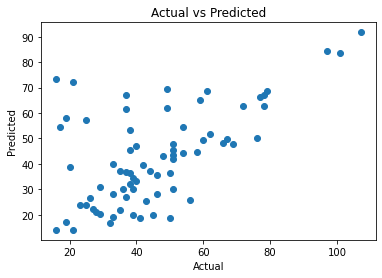

 
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ (–≤–µ—Å–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤): [0.03147687 0.00452243]
–°–º–µ—â–µ–Ω–∏–µ (—Å–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω): 0.0


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
# ...

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â–∏–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä—ã X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è y_train –ø–æ—Å–ª–µ 31.01.2024
y_train = df_reg_copy[df_reg_copy['date'] > '2024-01-31']['all_actions']

# –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è X_train –ø–æ—Å–ª–µ 31.01.2024 –∏–∑ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Å—Ç–æ–ª–±—Ü–æ–≤
X_train = df_reg_copy[df_reg_copy['date'] > '2024-01-31'][['sum', 'price']]
#X_train = df_reg_copy[df_reg_copy['date'] > '2024-01-31'][['sum', 'price', 'free_pr']]

#y_train = df_reg_copy['all_actions']
#X_train = df_reg_copy[['sum', 'price', 'free_pr']]
#X_train = df_reg_copy[['sum', 'price']]

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = LinearRegression(fit_intercept=False)
#model = LinearRegression()
model.fit(X_train, y_train)

# –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
plt.scatter(y_train, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


# –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ (–≤–µ—Å–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤)
coefficients = model.coef_

# –°–º–µ—â–µ–Ω–∏–µ (—Å–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω)
intercept = model.intercept_
print(" ")
print("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ (–≤–µ—Å–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤):", coefficients)
print("–°–º–µ—â–µ–Ω–∏–µ (—Å–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω):", intercept)

C:\Users\OLEG\AppData\Local\Temp/ipykernel_19740/314322560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_copy_graph['predicted'] = y_pred


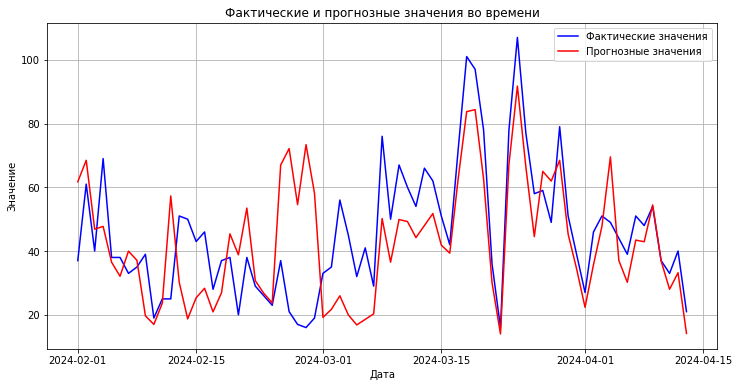

In [123]:

df_reg_copy_graph = df_reg_copy[df_reg_copy['date'] > '2024-01-31']

df_reg_copy_graph['predicted'] = y_pred


plt.figure(figsize=(12, 6))
plt.plot(df_reg_copy_graph['date'], df_reg_copy_graph['all_actions'], label='–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è',  color='blue')
plt.plot(df_reg_copy_graph['date'], df_reg_copy_graph['predicted'], label='–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è',  color='red')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
plt.title('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∏ –ø—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤–æ –≤—Ä–µ–º–µ–Ω–∏')
plt.legend()
plt.grid(True)
plt.show()

#### –ú–û–î–ï–õ–ò –†–ï–ì–†–ï–°–°–ò–ò –î–õ–Ø –û–¶–ï–ù–ö–ò –ö–û–≠–§–§–ò–¶–ò–ï–ù–¢–û–í –ò–ù–í–ï–°–¢–ò–¶–ò–ô –í –î–ò–†–ï–ö–¢ –ò –ü–£–ë–õ–ò–ö–ê–¶–ò–ò

–ó–∞–¥–∞—á–∞ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–µ —Å—Ç–∞–≤–∏–ª–∞—Å—å –Ω–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ, –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–∞—è —Ü–µ–ª—å, –ø–æ–Ω—è—Ç—å –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Å–∏—Ç—É–∞—Ü–∏—è –æ–ø–∏—Å—ã–≤–∞–µ—Ç—Å—è –º–æ–¥–µ–ª—å—é –∏ –∫–∞–∫–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –ø–æ–ª—É—á–∞—é—Ç—Å—è.

–í–æ –≤—Å–µ—Ö –º–æ–¥–µ–ª—è—Ö –±–µ—Å–ø–ª–∞—Ç–Ω—ã–µ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –∏–º–µ–ª–∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç, —á—Ç–æ –Ω–µ –∏–º–µ–µ—Ç –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–æ–≥–æ —Å–º—ã—Å–ª–∞ (–∫–æ–≥–¥–∞ –ø–ª–∞—Ç–Ω—ã–µ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –∏–º–µ—é—Ç –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç). –Ø —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—é —ç—Ç–æ –∫–∞–∫ –ª–æ–∂–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –∏ –∏—Å–∫–ª—é—á–∏–ª —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ. –ö–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å.
–¢–∞–∫–∂–µ –µ—Å—Ç—å –≤–∞—Ä–∏–∞–Ω—Ç—ã –≥–¥–µ –∏—Å–∫–ª—é—á–∞–µ—Ç—Å—è —Å–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω. –§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è –∫–æ–º–ø–∞–Ω–∏—è –ø–æ–¥–Ω—è–ª–∞ —Ü–µ–ª–µ–≤—ã–µ –¥–µ–π—Å–≤—Ç–∏—è —Å 0, –ø–æ—ç—Ç–æ–º—É –≥–æ–≤–æ—Ä–∏—Ç—å –æ –Ω–µ–∫–æ–µ–º "–µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ–º" —É—Ä–æ–≤–Ω–µ (–∏–ª–∏ —É—Ä–æ–≤–Ω–µ —Å—É—â–µ—Å–≤—É—é—â–µ–º –±–µ–∑ —Ä–µ–∫–ª–∞–º–Ω–æ–π –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –Ω–µ–ª—å–∑—è). –ì–æ–≤–æ—Ä–∏—Ç—å –æ —É–∂–µ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω–æ–º —ç—Ñ—Ñ–µ–∫—Ç–µ —Ç–∞–∫–∂–µ –ø—Ä–µ–∂–¥–µ–≤–Ω–µ–º–µ–Ω–Ω–æ.

–ü–µ—Ä–≤–∞—è –º–æ–¥–µ–ª—å (—Å–æ —Å–≤–æ–±–æ–¥–Ω—ã–º —á–ª–µ–Ω–æ–º, —Å–æ –≤—Å–µ–º–∏ –¥–∞–Ω–Ω—ã–º–∏):

y = 18,2 + 0,017 * sum + 0,0036 * price  -5,89 * free_pr
R^2 Score: 0.279

–í—Ç–æ—Ä–∞—è –º–æ–¥–µ–ª—å (–±–µ–∑ —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞, –≤—Å–µ –¥–∞–Ω–Ω—ã–µ):
y = 0,029 * sum + 0,0049 * price  -3,08 * free_pr
R^2 Score: 0.146

–¢—Ä–µ—Ç—å—è –º–æ–¥–µ–ª—å(–±–µ–∑ —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞, –±–µ–∑ –±–µ—Å–ø–ª–∞—Ç–Ω—ã—Ö –ø—É–±–ª–∏–∫–∞—Ü–∏–π):
y = 0,029 * sum + 0,0049 * price
R^2 Score: 0.145

–ß–µ—Ç–≤–µ—Ä—Ç–∞—è –º–æ–¥–µ–ª—å (—Å —Ñ–µ–≤, –∫–æ–≥–¥–∞ –º–æ–¥–µ–ª—å –æ–±—É—á–∏–ª–∞—Å—å, —Å–æ —Å–≤–æ–± —á–ª–µ–Ω–æ–º):
y = 19 + 0,02 * sum + 0,003 * price  -10,1 * free_pr
R^2 Score: 0.368


–ü—è—Ç–∞—è –º–æ–¥–µ–ª—å (—Å —Ñ–µ–≤, —Å–æ —Å–≤ —á–ª–µ–Ω–æ–º, –±–µ–∑ –±–µ—Å–ø–ª –ø—É–±–ª–∏–∫–∞—Ü–∏–π):
y = 18,7 + 0,02 * sum + 0,003 * price 
R^2 Score: 0.358

–®–µ—Å—Ç–∞—è –º–æ–¥–µ–ª—å (—Å —Ñ–µ–≤, –±–µ–∑ —Å–≤ —á–ª–µ–Ω–∞, –±–µ–∑ –±–µ—Å–ø–ª –ø—É–±–ª–∏–∫–∞—Ü–∏–π):
y = 0,031 * sum + 0,0045 * price 
R^2 Score: 0.216

–ü—Ä–∏ —ç—Ç–æ–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ (–ø–æ –ø–æ—Å–ª–µ–¥–Ω–µ–π –º–æ–¥–µ–ª–∏) –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –µ—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∑–æ–Ω —Å–µ—Ä—å–µ–∑–Ω—ã—Ö –æ—à–∏–±–æ–∫, –≤ –æ—Å—Ç–∞–ª—å–Ω–æ–º —Ä–∞—Å—Å—á–µ—Ç–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã —Å–æ–≤–ø–∞–¥–∞—é—Ç —Å —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–º–∏. 


–¶–µ–ª–µ–≤–æ–µ –¥–µ–π—Å—Ç–≤–∏–µ –æ—Ç –¥–∏—Ä–µ–∫—Ç–∞ 32 —Ä—É–±–ª—è
–¶–µ–ª–µ–≤–æ–µ –¥–µ–π—Å—Ç–≤–∏–µ –æ—Ç PR 222 —Ä—É–±–ª—è

### –í–ê–†–ò–ê–ù–¢ –ú–û–î–ï–õ–ò –†–ï–ì–†–ï–°–°–ò–ò –û–¢ –ß–ò–°–õ–ê –ü–û–ö–ê–ó–û–í –ò PR –ü–£–ë–õ–ò–ö–ê–¶–ò–ô

In [127]:
df_reg_show = df [['date', 'shows','all_actions', 
              'weekday','name']]

Mean Squared Error: 147.07517331301653
R^2 Score: 0.6590536272223213


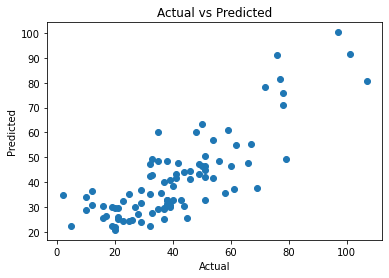

 
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ (–≤–µ—Å–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤): [1.43858294e-03 4.97418604e+00]
–°–º–µ—â–µ–Ω–∏–µ (—Å–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω): 13.663665095009254


In [131]:
# –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è y_train –ø–æ—Å–ª–µ 31.01.2024
#y_train = df_reg_show[df_reg_copy['date'] > '2024-01-31']['all_actions']
y_train = df_reg_show['all_actions']

# –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è X_train –ø–æ—Å–ª–µ 31.01.2024 –∏–∑ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Å—Ç–æ–ª–±—Ü–æ–≤
X_train = df_reg_show [['shows', 'name']]
#X_train = df_reg_show [df_reg_copy['date'] > '2024-01-31'][['shows', 'name']]
#X_train = df_reg_show [df_reg_copy['date'] > '2024-01-31'][['sum', 'price', 'free_pr']]

#y_train = df_reg_copy['all_actions']
#X_train = df_reg_copy[['sum', 'price', 'free_pr']]
#X_train = df_reg_copy[['sum', 'price']]

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
#model = LinearRegression(fit_intercept=False)
model = LinearRegression()
model.fit(X_train, y_train)

# –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
plt.scatter(y_train, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


# –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ (–≤–µ—Å–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤)
coefficients = model.coef_

# –°–º–µ—â–µ–Ω–∏–µ (—Å–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω)
intercept = model.intercept_
print(" ")
print("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ (–≤–µ—Å–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤):", coefficients)
print("–°–º–µ—â–µ–Ω–∏–µ (—Å–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω):", intercept)

#### –ú–û–î–ï–õ–ò –ó–ê–í–ò–°–ò–ú–û–°–¢–ò –¶–ï–õ–ï–í–´–• –î–ï–ô–°–¢–í–ò–ô –û–¢ –ü–û–ö–ê–ó–û–í –ò –°–¢–ê–¢–ï–ô

–ú–æ–¥–µ–ª—å 7 (–æ—Ç –ø–æ–∫–∞–∑–æ–≤ –∏ —Å—Ç–∞—Ç–µ–π —Å —Ñ–µ–≤—Ä–∞–ª—è)

y = 0,002 * show + 6,87 * name 
R^2 Score: 0.486


–ú–æ–¥–µ–ª—å 8 (—Å –Ω–∞—á–∞–ª–∞ —Å–æ —Å–≤–æ–±–æ–¥–Ω—ã–º —á–ª–µ–Ω–æ–º)
y = 13.66 + 0,0014 * show + 4.97 * name 
R^2 Score: 0.659


–ü–æ—Å–ª–µ–¥–Ω—è—è –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ —á–∏—Å–ª–æ —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç—Å—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–π –º–æ–¥–µ–ª—å—é.

–û–∫–æ–ª–æ 14 —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π –≤—ã–≥–ª—è–¥—è—Ç –∫–∞–∫ —Å—Ç–∞–±–∏–ª—å–Ω—ã–π –µ–∂–µ–¥–Ω–µ–≤–Ω—ã–π —Ñ–æ–Ω
714 –ø–æ–∫–∞–∑–æ–≤ –æ–±–µ—Å–ø–µ—á–∏–≤–∞—é—Ç 1 —Ü–µ–ª–µ–≤–æ–µ –¥–µ–π—Å—Ç–≤–∏–µ
1 –ø—É–±–ª–∏–∫–∞—Ü–∏—è –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –ø–æ—á—Ç–∏ 5 —Ü–µ–ª–µ–≤—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π

–ü—Ä–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–∏ –¥–µ–Ω–µ–∂–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω —Å–∏—Ç—É–∞—Ü–∏—è —É—Å–ª–æ–∂–Ω—è–µ—Ç—Å—è, —Ç.–∫. —Ü–µ–Ω—ã –Ω–∞ –ø–æ–∫–∞–∑—ã –∑–∞ —ç—Ç–æ—Ç –ø–µ—Ä–∏–æ–¥ –º–µ–Ω—è–ª–∏—Å—å –≤ 2 —Ä–∞–∑–∞, –∞ —Ü–µ–Ω—ã –Ω–∞ PR –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ—Ç 0 –¥–æ 10 000 —Ä—É–±

C:\Users\OLEG\AppData\Local\Temp/ipykernel_19740/1638662734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_copy_graph['predicted'] = y_pred


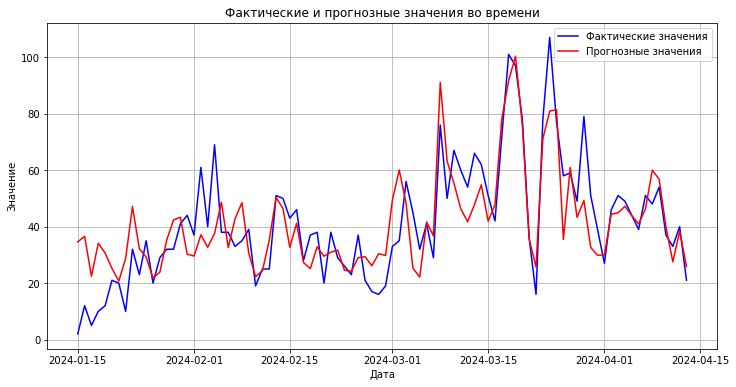

In [133]:
#df_reg_copy_graph = df_reg_show[df_reg_show['date'] > '2024-01-31']
df_reg_copy_graph = df_reg_show
df_reg_copy_graph['predicted'] = y_pred


plt.figure(figsize=(12, 6))
plt.plot(df_reg_copy_graph['date'], df_reg_copy_graph['all_actions'], label='–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è',  color='blue')
plt.plot(df_reg_copy_graph['date'], df_reg_copy_graph['predicted'], label='–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è',  color='red')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
plt.title('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∏ –ø—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤–æ –≤—Ä–µ–º–µ–Ω–∏')
plt.legend()
plt.grid(True)
plt.show()

–ø–ª–∞–Ω –æ—Ç—á–µ—Ç–∞:

- –≥—Ä–∞—Ñ–∏–∫ –º–æ–¥–µ–ª–∏ –∏ —Ñ–∞–∫—Ç–∞ - –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –ø—Ä—è–º–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–ª–µ–≤—ã–µ –¥–µ–π—Å—Ç–≤–∏—è
- —Ä–æ–ª—å / —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–∞–∂–¥–æ–≥–æ –≤–∏–¥–∞ –¥–µ–π—Å—Ç–≤–∏–π
- –ü–† –¥–ª—è —Å–∞–π—Ç–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø—Ä—è–º—ã–µ –∑–∞—Ö–æ–¥—ã (–ø–æ–∏—Å–∫) –æ–Ω–∏ –Ω–∞ –¶–µ–ª–µ–≤—ã–µ –¥–µ–π—Å—Ç–≤–∏—è
- —É–¥–∞—á–Ω—ã–µ –Ω–µ —É–¥–∞—á–Ω—ã–µ –ü–† –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ (–ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å —Ç–µ–º–∞—Ç–∏–∫—É, –º–æ–∂–µ—Ç –±—ã—Ç—å –¥–æ—Ä–æ–≥–∏–µ –∏ –Ω–µ—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–µ —ç—Ç–æ —Ä–µ–¥–∫–∏–µ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—ã)

- 